In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [3]:
# Congressional Member Vote Averages
trump_score_data = "https://projects.fivethirtyeight.com/congress-tracker-data/csv/averages.csv"

In [4]:
ts = pd.read_csv(trump_score_data)
ts["party"] = ts["party"].replace({
    "Republican": "R",
    "Democrat": "D",
    "Independent": "I"
})
ts.head()

,congress,chamber,bioguide,last_name,state,district,party,votes,agree_pct,predicted_agree,net_trump_vote
0,0,house,A000055,Aderholt,AL,4.0,R,118,0.974576,0.954666,63.0
1,115,house,A000055,Aderholt,AL,4.0,R,95,0.968421,0.946349,63.0
2,116,house,A000055,Aderholt,AL,4.0,R,23,1.000000,0.989019,63.0
3,0,house,A000367,Amash,MI,3.0,R,116,0.603448,0.802401,9.4
4,115,house,A000367,Amash,MI,3.0,R,96,0.541667,0.847386,9.4


In [61]:
ts115r = ts115[ts115["party"]=="R"]
ts116r = ts116[ts116["party"]=="R"]

In [185]:
r = ts[ts["party"]=="R"]["agree_pct"]
d = ts[ts["party"]=="D"]["agree_pct"]
i = ts[ts["party"]=="I"]["agree_pct"]

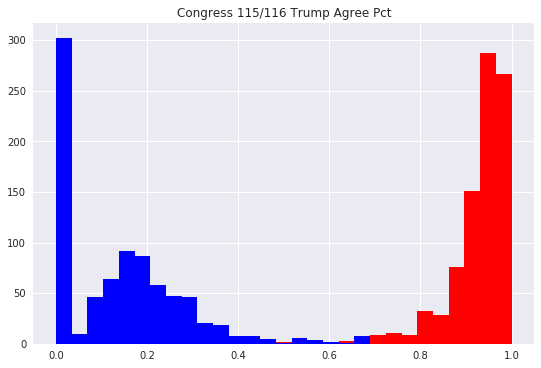

In [186]:
bins = np.linspace(0, 1, 30)
plt.hist(r, bins=bins, label="r", color="red")
plt.hist(d, bins=bins, label="d", color="blue")
plt.title("Congress 115/116 Trump Agree Pct")
plt.show()

In [84]:
r115 = ts115[ts115["party"]=="R"]["agree_pct"]
r116 = ts116[ts116["party"]=="R"]["agree_pct"]

d115 = ts115[ts115["party"]=="D"]["agree_pct"]
d116 = ts116[ts116["party"]=="D"]["agree_pct"]

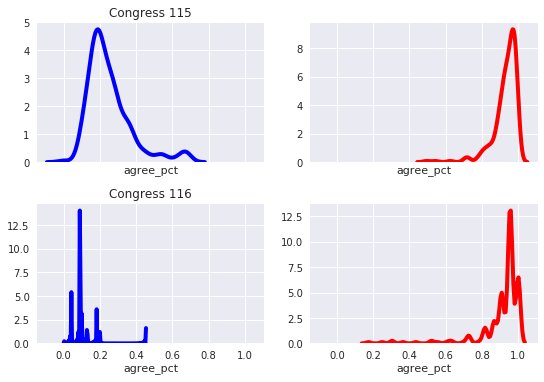

In [180]:
fig, ax = plt.subplots(2, 2, sharex=True)

sns.distplot(d115, ax=ax[0,0], hist=False, kde=True, kde_kws={'linewidth': 4, "color": "blue"}).set_title("Congress 115")
sns.distplot(r115, ax=ax[0,1], hist=False, kde=True, kde_kws={'linewidth': 4, "color": "red"})

sns.distplot(d116, ax=ax[1,0], hist=False, kde=True, kde_kws={'linewidth': 4, "color":"blue"}).set_title("Congress 116")
sns.distplot(r116, ax=ax[1,1], hist=False, kde=True, kde_kws={'linewidth': 4, "color":"red"})

fig.subplots_adjust(hspace=.3)

plt.show()

Text(0.5, 1.0, 'Congress Members by Party')

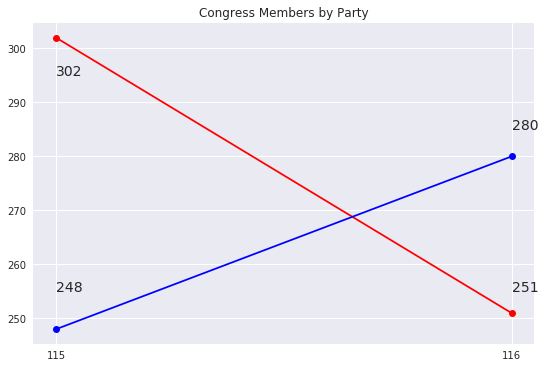

In [182]:
r115_tot = ts115[ts115["party"]=="R"].shape[0]
d115_tot = ts115[ts115["party"]=="D"].shape[0]


r116_tot = ts116[ts116["party"]=="R"].shape[0]
d116_tot = ts116[ts116["party"]=="D"].shape[0]

plt.plot(["115", "116"], [r115_tot, r116_tot], "ro-", color="red")
plt.text("115", 295, r115_tot)
plt.text("115", 255, d115_tot)

plt.plot(["115", "116"], [d115_tot, d116_tot], "ro-", color="blue")
plt.text("116", 285, d116_tot)
plt.text("116", 255, r116_tot)

plt.title("Congress Members by Party")

In [150]:
r = ts[ts["party"]=="R"].sort_values("agree_pct")
least_trump_rep = r.iloc[:50]["state"].value_counts()[:6]

In [154]:
d = ts[ts["party"]=="D"].sort_values("agree_pct", ascending=False)
most_trump_dem = d.iloc[:50]["state"].value_counts()[:6]

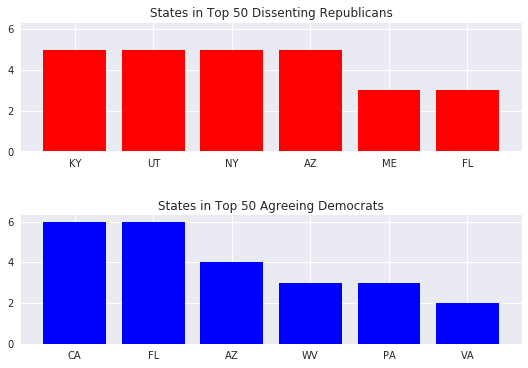

In [181]:
fig, ax = plt.subplots(2,1, sharey=True)

least_r_states = least_trump_rep.index.values
most_d_states = most_trump_dem.index.values

ax[0].bar(least_r_states, least_trump_rep.values, color="red")
ax[0].set_title("States in Top 50 Dissenting Republicans")
ax[1].bar(most_d_states, most_trump_dem.values, color="blue")
ax[1].set_title("States in Top 50 Agreeing Democrats")
fig.subplots_adjust(hspace=.5)
plt.show()